---
# Creating occurrence file

Read in the datafile we just created from `sound_production_to_presence.ipynb`

In [1]:
# df_presence.dtypes.values

```
array([dtype('<M8[ns]'), dtype('float64'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('<M8[ns]'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('int64'), dtype('<M8[ns]')],
      dtype=object)
```

In [2]:
import pandas as pd
import numpy as np

fname = 'data/sanctsound_presence.zip'

df_pres = pd.read_csv(fname,
                       #dtype = df_occur.dtypes.values, 
                       compression='zip')

df_pres['station'] = df_pres['dataset_id'].str.split("_",expand=True)[1]+"_"+df_pres['dataset_id'].str.split("_",expand=True)[2]

df_pres.sample(10)

C:\Users\Mathew.Biddle\AppData\Local\Temp\3\ipykernel_17860\3125043652.py:6: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pres = pd.read_csv(fname,


,start_time,dolphin_presence,dataset_id,WKT,decimalLatitude,decimalLongitude,vernacularName,time,bluewhale_presence,bluewhale_manual_presence,...,minkewhale_presence,plainfinmidshipman_presence,northatlanticrightwhale_presence,scientificName,scientificNameID,taxonRank,kingdom,propagationFrequency,eventDate,station
415906,NaN,NaN,noaaSanctSound_MB01_06_bluewhale,POINT (36.7977 -121.9757),36.79770,-121.975700,blue whale,2020-09-15 23:30:22.280000000,1.0,NaN,...,NaN,NaN,NaN,Balaenoptera musculus,urn:lsid:marinespecies.org:taxname:137090,Species,Animalia,63,2020-09-15 23:30:22.280000000,MB01_06
10497,NaN,NaN,noaaSanctSound_CI02_05_bluewhale,POINT (34.0853 -120.5223),34.08530,-120.522300,blue whale,2020-07-25 11:09:45.592000000,1.0,NaN,...,NaN,NaN,NaN,Balaenoptera musculus,urn:lsid:marinespecies.org:taxname:137090,Species,Animalia,63,2020-07-25 11:09:45.592000000,CI02_05
381641,NaN,NaN,noaaSanctSound_MB01_03_bluewhale,POINT (36.798 -121.976),36.79800,-121.976000,blue whale,2019-11-09 15:04:28.504000000,1.0,NaN,...,NaN,NaN,NaN,Balaenoptera musculus,urn:lsid:marinespecies.org:taxname:137090,Species,Animalia,63,2019-11-09 15:04:28.504000000,MB01_03
255460,NaN,NaN,noaaSanctSound_CI04_06_bluewhale,POINT (33.8489 -120.1174),33.84890,-120.117400,blue whale,2020-10-27 03:05:18.896000256,1.0,NaN,...,NaN,NaN,NaN,Balaenoptera musculus,urn:lsid:marinespecies.org:taxname:137090,Species,Animalia,63,2020-10-27 03:05:18.896000256,CI04_06
225741,NaN,NaN,noaaSanctSound_CI04_05_bluewhale,POINT (33.8489 -120.1171),33.84890,-120.117100,blue whale,2020-09-08 00:36:44.752000000,1.0,NaN,...,NaN,NaN,NaN,Balaenoptera musculus,urn:lsid:marinespecies.org:taxname:137090,Species,Animalia,63,2020-09-08 00:36:44.752000000,CI04_05
172865,NaN,NaN,noaaSanctSound_CI04_03_bluewhale,POINT (33.84888 -120.117),33.84888,-120.117000,blue whale,2019-10-14 10:55:47.312000000,1.0,NaN,...,NaN,NaN,NaN,Balaenoptera musculus,urn:lsid:marinespecies.org:taxname:137090,Species,Animalia,63,2019-10-14 10:55:47.312000000,CI04_03
420046,NaN,NaN,noaaSanctSound_MB01_06_bluewhale,POINT (36.7977 -121.9757),36.79770,-121.975700,blue whale,2020-10-01 23:23:38.016000000,1.0,NaN,...,NaN,NaN,NaN,Balaenoptera musculus,urn:lsid:marinespecies.org:taxname:137090,Species,Animalia,63,2020-10-01 23:23:38.016000000,MB01_06
169986,NaN,NaN,noaaSanctSound_CI04_03_bluewhale,POINT (33.84888 -120.117),33.84888,-120.117000,blue whale,2019-10-06 16:06:01.224000000,1.0,NaN,...,NaN,NaN,NaN,Balaenoptera musculus,urn:lsid:marinespecies.org:taxname:137090,Species,Animalia,63,2019-10-06 16:06:01.224000000,CI04_03
563970,NaN,NaN,noaaSanctSound_MB03_03_bluewhale,POINT (36.37021 -122.314903),36.37021,-122.314903,blue whale,2020-08-17 10:58:16.928000000,1.0,NaN,...,NaN,NaN,NaN,Balaenoptera musculus,urn:lsid:marinespecies.org:taxname:137090,Species,Animalia,63,2020-08-17 10:58:16.928000000,MB03_03
585049,NaN,NaN,noaaSanctSound_MB03_04_bluewhale,POINT (36.37021 -122.314903),36.37021,-122.314903,blue whale,2020-11-06 00:00:22.496000000,1.0,NaN,...,NaN,NaN,NaN,Balaenoptera musculus,urn:lsid:marinespecies.org:taxname:137090,Species,Animalia,63,2020-11-06 00:00:22.496000000,MB03_04


# **To Do: Truncate down to the day**

For one day, was there an acoustic presence for x species.


In [3]:
cols = [col for col in df_pres.columns if 'presence' in col]

cols.extend([col for col in df_pres.columns if 'detection_count' in col])

cols
#df_occur_copy[cols].plot()

['dolphin_presence',
 'bluewhale_presence',
 'bluewhale_manual_presence',
 'bocaccio_presence',
 'finwhale_presence',
 'pinniped_presence',
 'seiwhale_presence',
 'atlanticcod_presence',
 'humpbackwhale_presence',
 'killerwhale_presence',
 'minkewhale_presence',
 'plainfinmidshipman_presence',
 'northatlanticrightwhale_presence',
 'redgrouper_detection_count',
 'blackgrouper_detection_count']

What we need to end up with is a table with the following information.

Species `x` made an acoustic sound at `y` location on `z` day.

Our sounding information is high resolution, so we want to group the sounds into daily sounds. But, we need to preserve the species, and location information.

Groupby DAY. This is doing the work of capturing daily observations (truncate by day).

Here we are grouping the dataframe by the species, spatial coordinates, and date.

### Groupby use .dt.date 

```
out2 = df_occur.groupby(df_occur.eventDate.dt.date)[cols].sum()

out2
```

In [ ]:
# df_pres['eventDate'] = pd.to_datetime(df_pres['eventDate'], format='%Y-%m-%d %H:%M:%S.%f')

# df_test = df_pres.set_index('eventDate')

# temp = df_test.loc['2021-09-25']

# temp.loc[(temp['vernacularName']=='dolphin') & (temp['station']=='SB02')]

In [4]:
df_pres['eventDate'] = pd.to_datetime(df_pres['eventDate'], format='%Y-%m-%d %H:%M:%S.%f')

df_pres.sort_values(by='eventDate', inplace=True)

group = df_pres.groupby(
    [df_pres.eventDate.dt.date,'station','vernacularName','scientificNameID','scientificName','taxonRank','kingdom','decimalLatitude','decimalLongitude','propagationFrequency']
)

counts = group[cols].count() # we just need to know if the species was present on that date and location.

counts = counts.reset_index(level=[0,1,2,3,4,5,6,7,8,9], allow_duplicates=True)

counts

,eventDate,station,vernacularName,scientificNameID,scientificName,taxonRank,kingdom,decimalLatitude,decimalLongitude,propagationFrequency,...,pinniped_presence,seiwhale_presence,atlanticcod_presence,humpbackwhale_presence,killerwhale_presence,minkewhale_presence,plainfinmidshipman_presence,northatlanticrightwhale_presence,redgrouper_detection_count,blackgrouper_detection_count
0,2018-11-01,CI01_01,bocaccio,urn:lsid:marinespecies.org:taxname:274833,Sebastes paucispinis,Species,Animalia,34.0438,-120.0811,300,...,0,0,0,0,0,0,0,0,0,0
1,2018-11-01,CI01_01,humpback whale,urn:lsid:marinespecies.org:taxname:137092,Megaptera novaeangliae,Species,Animalia,34.0438,-120.0811,300,...,0,0,0,1,0,0,0,0,0,0
2,2018-11-01,CI01_01,plainfin midshipman,urn:lsid:marinespecies.org:taxname:275658,Porichthys notatus,Species,Animalia,34.0438,-120.0811,300,...,0,0,0,0,0,0,1,0,0,0
3,2018-11-01,CI02_01,blue whale,urn:lsid:marinespecies.org:taxname:137090,Balaenoptera musculus,Species,Animalia,34.0856,-120.5232,63,...,0,0,0,0,0,0,0,0,0,0
4,2018-11-01,CI02_01,bocaccio,urn:lsid:marinespecies.org:taxname:274833,Sebastes paucispinis,Species,Animalia,34.0856,-120.5232,300,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22923,2021-12-31,CI03_07,fin whale,urn:lsid:marinespecies.org:taxname:137091,Balaenoptera physalus,Species,Animalia,33.4868,-119.0159,20,...,0,0,0,0,0,0,0,0,0,0
22924,2022-01-02,CI03_07,fin whale,urn:lsid:marinespecies.org:taxname:137091,Balaenoptera physalus,Species,Animalia,33.4868,-119.0159,20,...,0,0,0,0,0,0,0,0,0,0
22925,2022-01-03,CI03_07,fin whale,urn:lsid:marinespecies.org:taxname:137091,Balaenoptera physalus,Species,Animalia,33.4868,-119.0159,20,...,0,0,0,0,0,0,0,0,0,0
22926,2022-01-04,CI03_07,fin whale,urn:lsid:marinespecies.org:taxname:137091,Balaenoptera physalus,Species,Animalia,33.4868,-119.0159,20,...,0,0,0,0,0,0,0,0,0,0


In [5]:
counts['eventDate']=pd.to_datetime(counts['eventDate'])

counts = counts.set_index(counts['eventDate'])

counts

,eventDate,station,vernacularName,scientificNameID,scientificName,taxonRank,kingdom,decimalLatitude,decimalLongitude,propagationFrequency,...,pinniped_presence,seiwhale_presence,atlanticcod_presence,humpbackwhale_presence,killerwhale_presence,minkewhale_presence,plainfinmidshipman_presence,northatlanticrightwhale_presence,redgrouper_detection_count,blackgrouper_detection_count
eventDate,,,,,,,,,,,,,,,,,,,,,
2018-11-01,2018-11-01,CI01_01,bocaccio,urn:lsid:marinespecies.org:taxname:274833,Sebastes paucispinis,Species,Animalia,34.0438,-120.0811,300,...,0,0,0,0,0,0,0,0,0,0
2018-11-01,2018-11-01,CI01_01,humpback whale,urn:lsid:marinespecies.org:taxname:137092,Megaptera novaeangliae,Species,Animalia,34.0438,-120.0811,300,...,0,0,0,1,0,0,0,0,0,0
2018-11-01,2018-11-01,CI01_01,plainfin midshipman,urn:lsid:marinespecies.org:taxname:275658,Porichthys notatus,Species,Animalia,34.0438,-120.0811,300,...,0,0,0,0,0,0,1,0,0,0
2018-11-01,2018-11-01,CI02_01,blue whale,urn:lsid:marinespecies.org:taxname:137090,Balaenoptera musculus,Species,Animalia,34.0856,-120.5232,63,...,0,0,0,0,0,0,0,0,0,0
2018-11-01,2018-11-01,CI02_01,bocaccio,urn:lsid:marinespecies.org:taxname:274833,Sebastes paucispinis,Species,Animalia,34.0856,-120.5232,300,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,2021-12-31,CI03_07,fin whale,urn:lsid:marinespecies.org:taxname:137091,Balaenoptera physalus,Species,Animalia,33.4868,-119.0159,20,...,0,0,0,0,0,0,0,0,0,0
2022-01-02,2022-01-02,CI03_07,fin whale,urn:lsid:marinespecies.org:taxname:137091,Balaenoptera physalus,Species,Animalia,33.4868,-119.0159,20,...,0,0,0,0,0,0,0,0,0,0
2022-01-03,2022-01-03,CI03_07,fin whale,urn:lsid:marinespecies.org:taxname:137091,Balaenoptera physalus,Species,Animalia,33.4868,-119.0159,20,...,0,0,0,0,0,0,0,0,0,0


Let's confirm that we have unique location, date, and species.

For one species, tell me if we have occurrences of other species. For this we use the describe() function to give us a summary of all the other presence variables. If the statistics are all 0 for the other columns, than we are doing this correctly.

In [6]:
counts.loc[counts['scientificNameID']=='urn:lsid:marinespecies.org:taxname:137090',cols].describe()

,dolphin_presence,bluewhale_presence,bluewhale_manual_presence,bocaccio_presence,finwhale_presence,pinniped_presence,seiwhale_presence,atlanticcod_presence,humpbackwhale_presence,killerwhale_presence,minkewhale_presence,plainfinmidshipman_presence,northatlanticrightwhale_presence,redgrouper_detection_count,blackgrouper_detection_count
count,2745.0,2745.000000,2745.000000,2745.0,2745.0,2745.0,2745.0,2745.0,2745.0,2745.0,2745.0,2745.0,2745.0,2745.0,2745.0
mean,0.0,217.943169,0.421129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,290.032984,6.299879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,17.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,92.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,314.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,1952.000000,194.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cool! Looks like we are doing what we think we're doing. Now we can drop all of the presence columns, as we're identifying presence by indicating scientificNameID in the row. 

In [7]:
#columns = cols.extend(['eventDate'])

df_occur = counts.drop(columns=cols)

df_occur

,eventDate,station,vernacularName,scientificNameID,scientificName,taxonRank,kingdom,decimalLatitude,decimalLongitude,propagationFrequency
eventDate,,,,,,,,,,
2018-11-01,2018-11-01,CI01_01,bocaccio,urn:lsid:marinespecies.org:taxname:274833,Sebastes paucispinis,Species,Animalia,34.0438,-120.0811,300
2018-11-01,2018-11-01,CI01_01,humpback whale,urn:lsid:marinespecies.org:taxname:137092,Megaptera novaeangliae,Species,Animalia,34.0438,-120.0811,300
2018-11-01,2018-11-01,CI01_01,plainfin midshipman,urn:lsid:marinespecies.org:taxname:275658,Porichthys notatus,Species,Animalia,34.0438,-120.0811,300
2018-11-01,2018-11-01,CI02_01,blue whale,urn:lsid:marinespecies.org:taxname:137090,Balaenoptera musculus,Species,Animalia,34.0856,-120.5232,63
2018-11-01,2018-11-01,CI02_01,bocaccio,urn:lsid:marinespecies.org:taxname:274833,Sebastes paucispinis,Species,Animalia,34.0856,-120.5232,300
...,...,...,...,...,...,...,...,...,...,...
2021-12-31,2021-12-31,CI03_07,fin whale,urn:lsid:marinespecies.org:taxname:137091,Balaenoptera physalus,Species,Animalia,33.4868,-119.0159,20
2022-01-02,2022-01-02,CI03_07,fin whale,urn:lsid:marinespecies.org:taxname:137091,Balaenoptera physalus,Species,Animalia,33.4868,-119.0159,20
2022-01-03,2022-01-03,CI03_07,fin whale,urn:lsid:marinespecies.org:taxname:137091,Balaenoptera physalus,Species,Animalia,33.4868,-119.0159,20


Now we have an occurrence table! We have a species at a time and location.

Let's make an appropriate `occurrenceID` by appending the `vernacularName`, `station`, and `eventDate`.

Second we want to check that all occurrences are unique using this method. If the resultant table is empty, we have made locally unique identifiers.

In [25]:
df_occur['occurrenceID'] = df_occur['station'] + "_" + df_occur['vernacularName'].str.replace(' ','_') + "_" + df_occur['eventDate'].dt.strftime('%Y-%m-%d')

df_occur.loc[df_occur['occurrenceID'].duplicated(keep=False)]

,eventDate,station,vernacularName,scientificNameID,scientificName,taxonRank,kingdom,decimalLatitude,decimalLongitude,propagationFrequency,occurrenceID
eventDate,,,,,,,,,,,


Let's write it out as an occurrence file.

In [26]:
#df_occur.dop(columns=['eventDate'], inplace=True) # we can drop eventDate column now (it's our index)

fname_occur = 'data/occurrence.zip'
df_occur.to_csv(fname_occur,date_format='%Y-%m-%d', index=False, compression='zip')

# Post-processing analysis

Let's read it back in to do some fiddling.

In [27]:
import pandas as pd

occur = pd.read_csv(fname_occur, low_memory=False, compression='zip')

occur.sample(5)

,eventDate,station,vernacularName,scientificNameID,scientificName,taxonRank,kingdom,decimalLatitude,decimalLongitude,propagationFrequency,occurrenceID
22383,2021-10-16,MB01_09,humpback whale,urn:lsid:marinespecies.org:taxname:137092,Megaptera novaeangliae,Species,Animalia,36.79800,-122.975800,300,MB01_09_humpback_whale_2021-10-16
8846,2019-11-15,SB03_06,fin whale,urn:lsid:marinespecies.org:taxname:137091,Balaenoptera physalus,Species,Animalia,42.25553,-70.178973,20,SB03_06_fin_whale_2019-11-15
19724,2021-02-10,MB01_07,humpback whale,urn:lsid:marinespecies.org:taxname:137092,Megaptera novaeangliae,Species,Animalia,36.81467,-121.975930,300,MB01_07_humpback_whale_2021-02-10
6100,2019-08-26,CI04_03,dolphin,urn:lsid:marinespecies.org:taxname:2688,Cetacea,Infraorder,Animalia,33.84888,-120.117000,5000,CI04_03_dolphin_2019-08-26
12053,2020-03-22,MB01_04,blue whale,urn:lsid:marinespecies.org:taxname:137090,Balaenoptera musculus,Species,Animalia,36.79800,-121.976000,63,MB01_04_blue_whale_2020-03-22


In [17]:
occur['occurrenceID'][50]

'plainfin_midshipman_CI01_01_2018-11-05'

In [18]:
import humanize
import os

humanize.naturalsize(os.path.getsize('data/occurrence.zip'))

'108.8 kB'

In [19]:
humanize.naturalsize(os.path.getsize('data/sanctsound_presence.zip'))

'6.6 MB'

<AxesSubplot: xlabel='decimalLongitude', ylabel='decimalLatitude'>

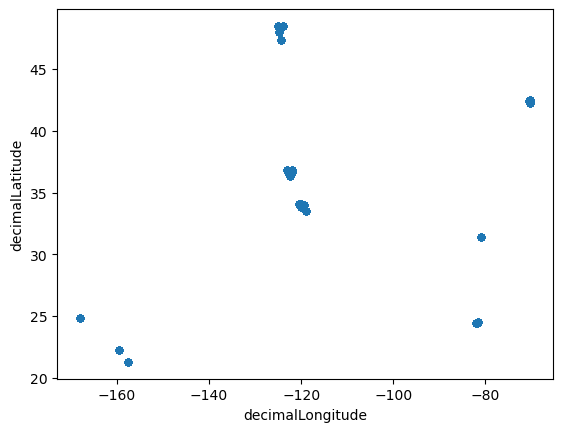

In [20]:
occur.plot.scatter(x='decimalLongitude',y='decimalLatitude')

In [21]:
import geopandas as gpd

  # read into geopandas dataframe for plotting
gdf = gpd.GeoDataFrame(
    occur, 
    geometry=gpd.points_from_xy(occur.decimalLongitude, occur.decimalLatitude),
    crs = "epsg:4326",
    )

gdf

,eventDate,station,vernacularName,scientificNameID,scientificName,taxonRank,kingdom,decimalLatitude,decimalLongitude,propagationFrequency,occurrenceID,geometry
0,2018-11-01,CI01_01,bocaccio,urn:lsid:marinespecies.org:taxname:274833,Sebastes paucispinis,Species,Animalia,34.0438,-120.0811,300,bocaccio_CI01_01_2018-11-01,POINT (-120.08110 34.04380)
1,2018-11-01,CI01_01,humpback whale,urn:lsid:marinespecies.org:taxname:137092,Megaptera novaeangliae,Species,Animalia,34.0438,-120.0811,300,humpback_whale_CI01_01_2018-11-01,POINT (-120.08110 34.04380)
2,2018-11-01,CI01_01,plainfin midshipman,urn:lsid:marinespecies.org:taxname:275658,Porichthys notatus,Species,Animalia,34.0438,-120.0811,300,plainfin_midshipman_CI01_01_2018-11-01,POINT (-120.08110 34.04380)
3,2018-11-01,CI02_01,blue whale,urn:lsid:marinespecies.org:taxname:137090,Balaenoptera musculus,Species,Animalia,34.0856,-120.5232,63,blue_whale_CI02_01_2018-11-01,POINT (-120.52320 34.08560)
4,2018-11-01,CI02_01,bocaccio,urn:lsid:marinespecies.org:taxname:274833,Sebastes paucispinis,Species,Animalia,34.0856,-120.5232,300,bocaccio_CI02_01_2018-11-01,POINT (-120.52320 34.08560)
...,...,...,...,...,...,...,...,...,...,...,...,...
22923,2021-12-31,CI03_07,fin whale,urn:lsid:marinespecies.org:taxname:137091,Balaenoptera physalus,Species,Animalia,33.4868,-119.0159,20,fin_whale_CI03_07_2021-12-31,POINT (-119.01590 33.48680)
22924,2022-01-02,CI03_07,fin whale,urn:lsid:marinespecies.org:taxname:137091,Balaenoptera physalus,Species,Animalia,33.4868,-119.0159,20,fin_whale_CI03_07_2022-01-02,POINT (-119.01590 33.48680)
22925,2022-01-03,CI03_07,fin whale,urn:lsid:marinespecies.org:taxname:137091,Balaenoptera physalus,Species,Animalia,33.4868,-119.0159,20,fin_whale_CI03_07_2022-01-03,POINT (-119.01590 33.48680)
22926,2022-01-04,CI03_07,fin whale,urn:lsid:marinespecies.org:taxname:137091,Balaenoptera physalus,Species,Animalia,33.4868,-119.0159,20,fin_whale_CI03_07_2022-01-04,POINT (-119.01590 33.48680)


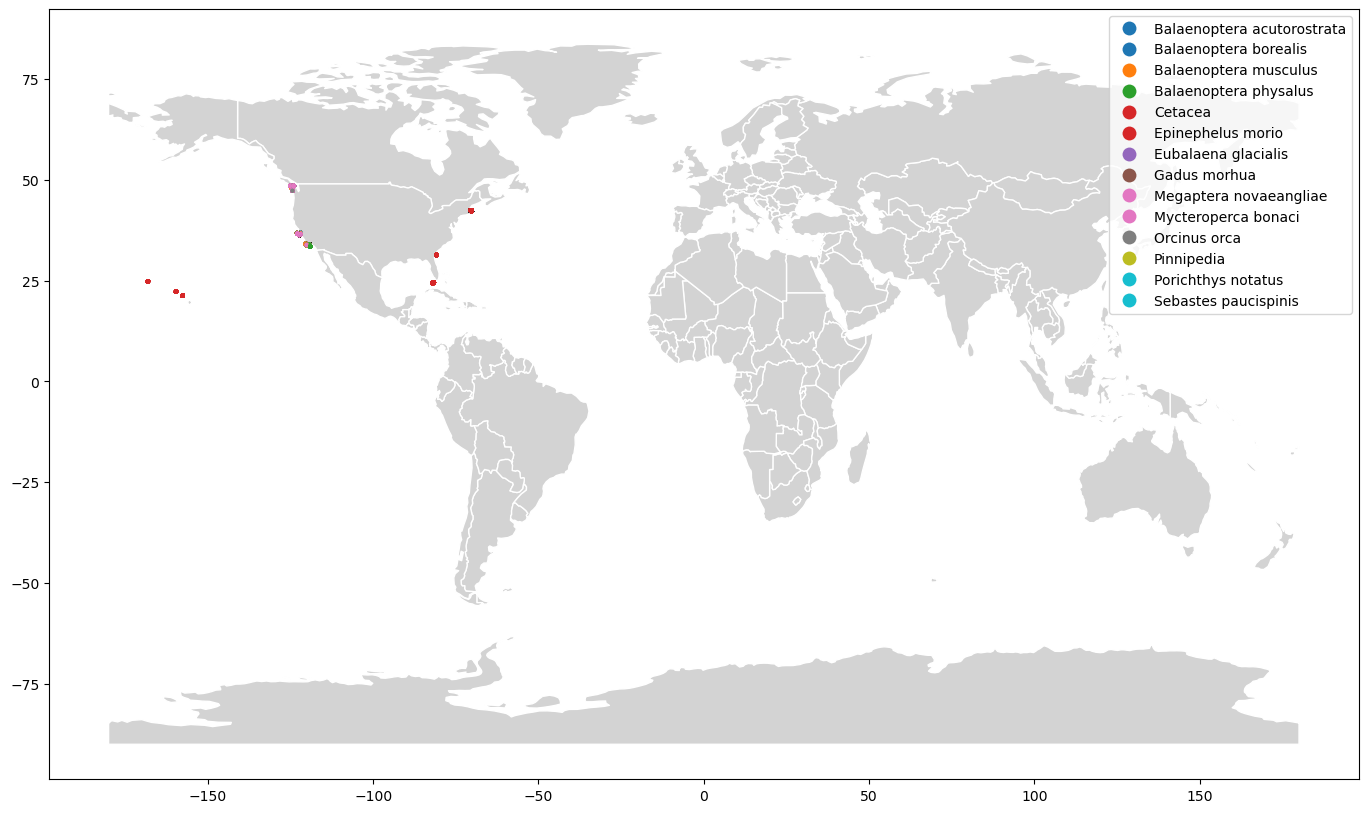

In [22]:
import matplotlib.pyplot as plt
from datetime import datetime

fig, ax = plt.subplots(figsize=(20,10))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.to_crs(gdf.crs)

world.plot(ax=ax, color='lightgrey', edgecolor='white')

gdf.plot(ax=ax, markersize=5, column='scientificName', legend=True)

plt.show()

Let's explore these data a little bit. But first, lets find the unique locations where each species is found, then we can explore those results.

In [24]:
gdf_unique = gdf.drop_duplicates(subset=["geometry", "scientificNameID"], keep='first')

gdf_unique.explore(column='vernacularName',tooltip=True, popup=True, tiles='CartoDB positron')